## **Inspect Model**

### **Imports**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys

ROOT_DIR = os.path.abspath("../")
print('Root directory:',ROOT_DIR)

sys.path.append(ROOT_DIR)
import mrcnn.model as modellib

import tdmms.tdmcoco as tdmcoco

%matplotlib inline 

LOGS_DIR = os.path.join(ROOT_DIR, "logs", "inspect")

if not os.path.exists(LOGS_DIR):
    os.makedirs(LOGS_DIR)
    print(f"Folder '{LOGS_DIR}' created.")

Root directory: c:\Users\gtgot\OneDrive\ML_Project


In [2]:
%load_ext autoreload
%autoreload 2
import bep.utils as utils
from bep.dataset import bepDataset

### **Load data**

In [3]:
dataset = 'data'
use_bs = True

In [ ]:
utils.create_dir_setup((7/9, 1/9, 1/9), dataset, use_bs)

train, val, test = utils.load_train_val_datasets(dataset, use_bs=use_bs)

print("BEP Train NbSe2 images: {} | Classes: {}".format(len(train.image_ids), train.class_names))
print("BEP Val NbSe2 images: {} | Classes: {}".format(len(val.image_ids), val.class_names))
print("BEP Test NbSe2 images: {} | Classes: {}".format(len(test.image_ids), test.class_names))

Directory setup correctly
BEP Train NbSe2 images: 7 | Classes: ['BG', 'Mono_NbSe2', 'Few_NbSe2', 'Thick_NbSe2']
BEP Val NbSe2 images: 1 | Classes: ['BG', 'Mono_NbSe2', 'Few_NbSe2', 'Thick_NbSe2']
BEP Test NbSe2 images: 1 | Classes: ['BG', 'Mono_NbSe2', 'Few_NbSe2', 'Thick_NbSe2']


### **Load Model**

In [5]:
config = tdmcoco.CocoConfig()

class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 1 + 3 + 0 # thin, few, thick, (and massive)
    DETECTION_MIN_CONFIDENCE = 0.7
    USE_MINI_MASK = False
config = InferenceConfig()
# config.display()

BEP_MODEL_PATH = os.path.join(ROOT_DIR, 'weights', 'RuCl3_mos2_5_split_0115.h5')

model_NbSe2 = modellib.MaskRCNN(mode="inference", model_dir=LOGS_DIR, config=config, name='RuCl3 Model')
print("RuCl3 Model, loading weights {}".format(BEP_MODEL_PATH))
model_NbSe2.load_weights(BEP_MODEL_PATH, by_name=True)

Instructions for updating:
Use fn_output_signature instead
RuCl3 Model, loading weights c:\Users\gtgot\OneDrive\ML_Project\weights\RuCl3_mos2_5_split_0115.h5


### **Run Model**

In [6]:
run_model = utils.runModel(model_NbSe2, config, plot_size=15)

In [7]:
# run_model.gt(dataset=test, rand=True, show_bbox=False)

image ID: ali.1 (0) 
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  243.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  119.30000  float64
image_metas              shape: (1, 16)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


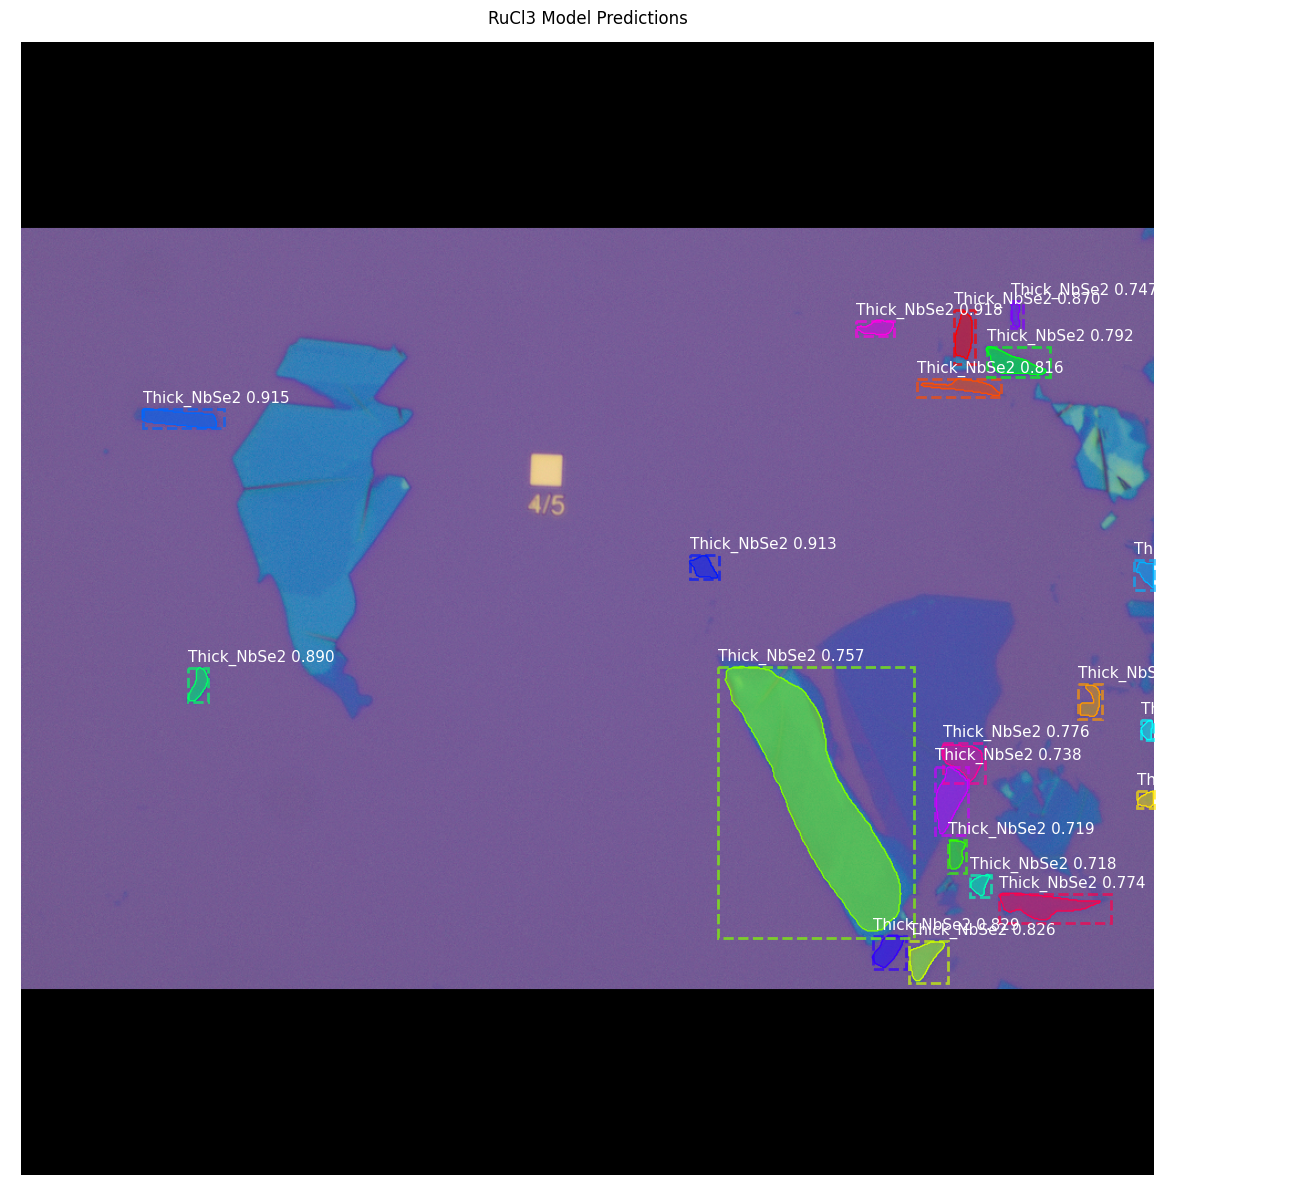

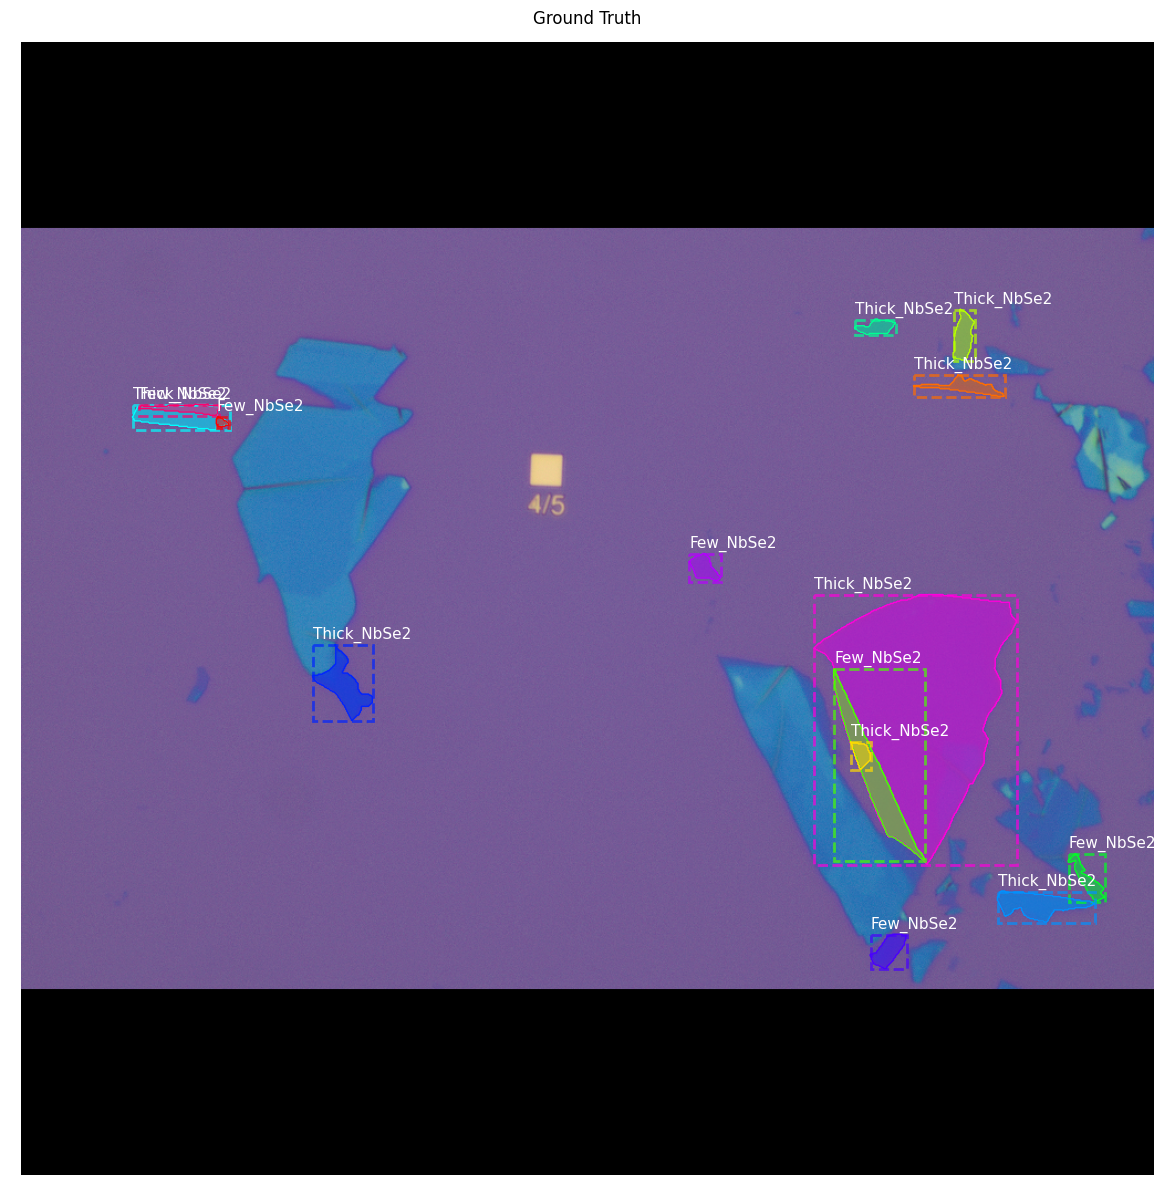

: 

In [8]:
run_model.run(dataset=val, image_idx=0)
run_model.gt()